In [2]:
import os
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Set paths to data

In [15]:
# Get current absolute path of parent folder of this file
path_notebooks = os.path.dirname(os.path.abspath('EDA_birds-40'))

# Get path of parent directory, i.e. path to repo
path = os.path.abspath(os.path.join(path_notebooks, os.pardir))

train_dir = os.path.join(path, 'data', 'europe-40', 'train')
#train_dir = os.path.join(path, 'data', '40_species_eu_birds', 'train')

# create pathlib object from string train_dir (path to train directory)
train_dir_pl = pathlib.Path(train_dir)

### Count number of species and images for each species

In [16]:
# How many training images do we have?
image_count = len(list(train_dir_pl.glob('*/*.jp*')))
print(f'Number of training samples: {image_count}')

Number of training samples: 5305


In [5]:
# get folders and number of files within folders
img_num = [len(files) for r, d, files in os.walk(train_dir)]
species = [d for r, d, files in os.walk(train_dir)][0]


In [6]:
species

['EURASIAN BLACK CAP',
 'EUROPEAN GOLDFINCH',
 'WHITE WAGTAIL',
 'EURASIAN WREN',
 'COLLARED DOVE',
 'SPOTTED FLYCATCHER',
 'SONG THRUSH',
 'EURASIAN MAGPIE',
 'EURASIEN JAY',
 'ROOK',
 'CRESTED NUTHATCH',
 'COAL TIT',
 'EURASIEN TREE SPARROW',
 'CARRION CROW',
 'EUROPEAN GREENFINCH',
 'EUROPEAN SERIN',
 'HOUSE SPARROW',
 'COMMON STARLING',
 'LONG TAILED TIT',
 'LESSER WHITETHROAT',
 'EURASIEN BLUE TIT',
 'COMMON CHAFFINCH',
 'BLACKBIRD',
 'COMMON SWIFT',
 'COMMON REDSTART',
 'GARDEN WARBLER',
 'DUNNOCK',
 'CHIFFCHAFF',
 'GREAT SPOTTED WOODPECKER',
 'COMMON HOUSE MARTIN',
 'GREAT TIT',
 'EURASIAN BULLFINCH',
 'YELLOWHAMMER',
 'SHORT-TOED TREECREEPER',
 'BARN SWALLOW',
 'COMMON WOOD PIGEON',
 'WILLOW WARBLER',
 'BLACK REDSTART',
 'ROBIN',
 'EUROPEAN JACKDAW']

In [7]:
# for some mysterious reason, I need to remove first entry as it is zero
img_num = img_num[1:]
img_num

[112,
 135,
 176,
 98,
 132,
 138,
 150,
 155,
 102,
 69,
 152,
 300,
 49,
 54,
 320,
 120,
 155,
 141,
 75,
 74,
 126,
 95,
 119,
 59,
 173,
 78,
 111,
 79,
 150,
 157,
 89,
 166,
 152,
 70,
 132,
 99,
 130,
 390,
 147,
 86]

Unfortunately, they are not in alphabetical order. Let's put the two lists as tuples together and sort them.

In [8]:
l = []
for sp, n in zip(species, img_num):
    l.append((sp, n))

In [9]:
l.sort()
l

[('BARN SWALLOW', 132),
 ('BLACK REDSTART', 390),
 ('BLACKBIRD', 119),
 ('CARRION CROW', 54),
 ('CHIFFCHAFF', 79),
 ('COAL TIT', 300),
 ('COLLARED DOVE', 132),
 ('COMMON CHAFFINCH', 95),
 ('COMMON HOUSE MARTIN', 157),
 ('COMMON REDSTART', 173),
 ('COMMON STARLING', 141),
 ('COMMON SWIFT', 59),
 ('COMMON WOOD PIGEON', 99),
 ('CRESTED NUTHATCH', 152),
 ('DUNNOCK', 111),
 ('EURASIAN BLACK CAP', 112),
 ('EURASIAN BULLFINCH', 166),
 ('EURASIAN MAGPIE', 155),
 ('EURASIAN WREN', 98),
 ('EURASIEN BLUE TIT', 126),
 ('EURASIEN JAY', 102),
 ('EURASIEN TREE SPARROW', 49),
 ('EUROPEAN GOLDFINCH', 135),
 ('EUROPEAN GREENFINCH', 320),
 ('EUROPEAN JACKDAW', 86),
 ('EUROPEAN SERIN', 120),
 ('GARDEN WARBLER', 78),
 ('GREAT SPOTTED WOODPECKER', 150),
 ('GREAT TIT', 89),
 ('HOUSE SPARROW', 155),
 ('LESSER WHITETHROAT', 74),
 ('LONG TAILED TIT', 75),
 ('ROBIN', 147),
 ('ROOK', 69),
 ('SHORT-TOED TREECREEPER', 70),
 ('SONG THRUSH', 150),
 ('SPOTTED FLYCATCHER', 138),
 ('WHITE WAGTAIL', 176),
 ('WILLOW WARBL

Now, we can unzip them again:

In [10]:
label = [l[i][0] for i in range(len(species))]
label_count = [l[i][1] for i in range(len(species))]

## Plotting

### with numpy & seaborn

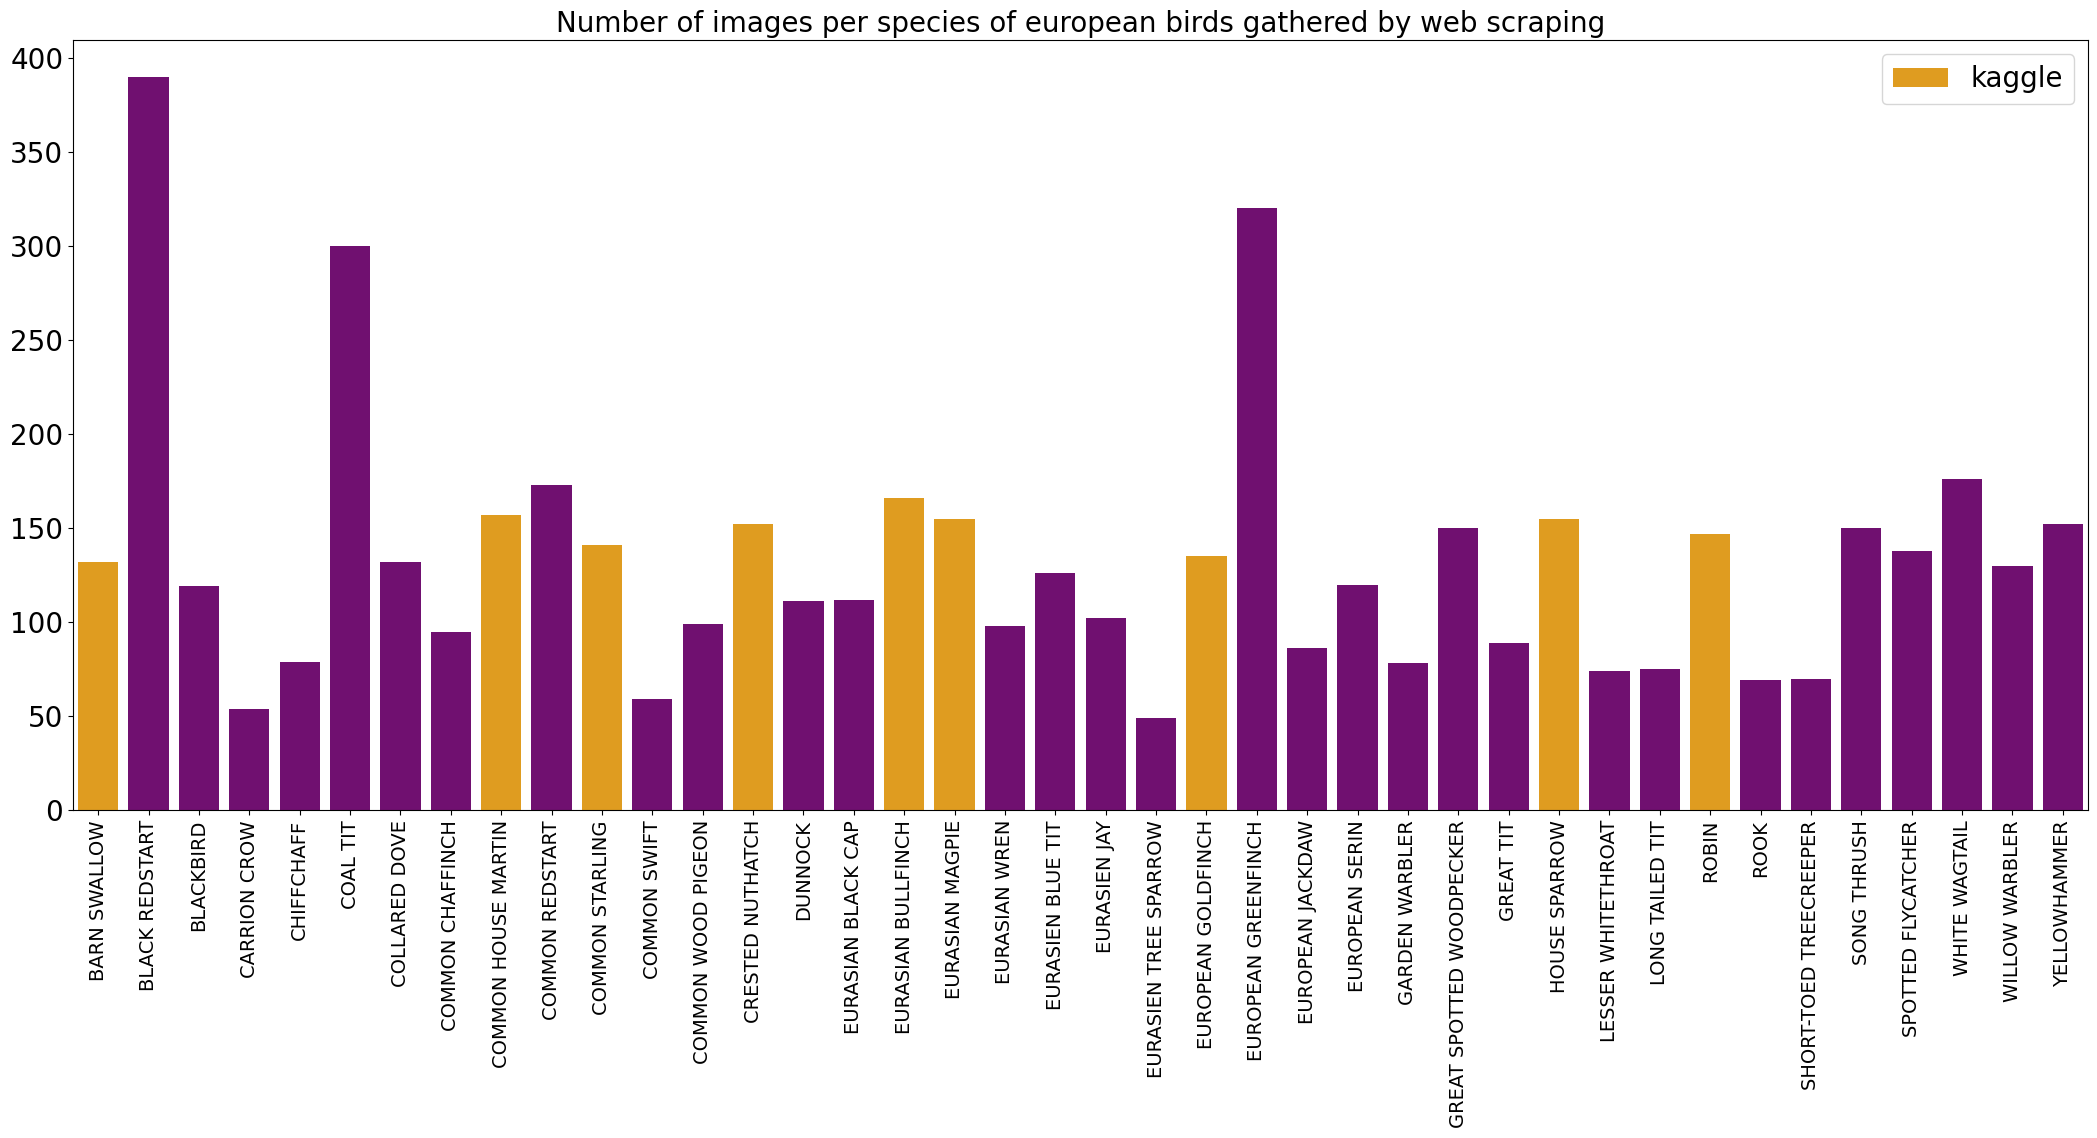

In [11]:
# define species from kaggle dataset
kaggle = ['BARN SWALLOW', 'COMMON HOUSE MARTIN', 'COMMON STARLING', 'CRESTED NUTHATCH', 'EURASIAN BULLFINCH', 'EURASIAN MAGPIE', 'EUROPEAN GOLDFINCH', 'HOUSE SPARROW', 'ROBIN']
kaggle_ixd = [0, 8, 10, 13, 16, 17, 22, 29 ,32]

# set x and y
values = np.array(label_count)   
idx = np.array(label) 

# create visualization
fig = plt.figure(figsize=(26,10))
#clrs = ['grey' if (x < max(values)) else 'red' for x in values ]
sns.color_palette()
clrs = ['orange' if (x in set(kaggle)) else 'purple' for x in idx]
sns.barplot(x=idx, y=values, palette=clrs, label='kaggle')
plt.title('Number of images per species of european birds gathered by web scraping', fontsize=20)
plt.legend(loc='upper right', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=20)
plt.xticks(rotation=90);

### with pandas & seaborn

In [12]:
# create dataframe and define source of data
d1 = 'web scraping'
d2 = 'kaggle'
d = [d1] * len(species)

df = pd.DataFrame({'species': label,
                   'count': label_count,
                   'dataset': d})

df['dataset'].loc[0, 8, 10, 13, 16, 17, 22, 29 ,32] = d2

/Users/philipp/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


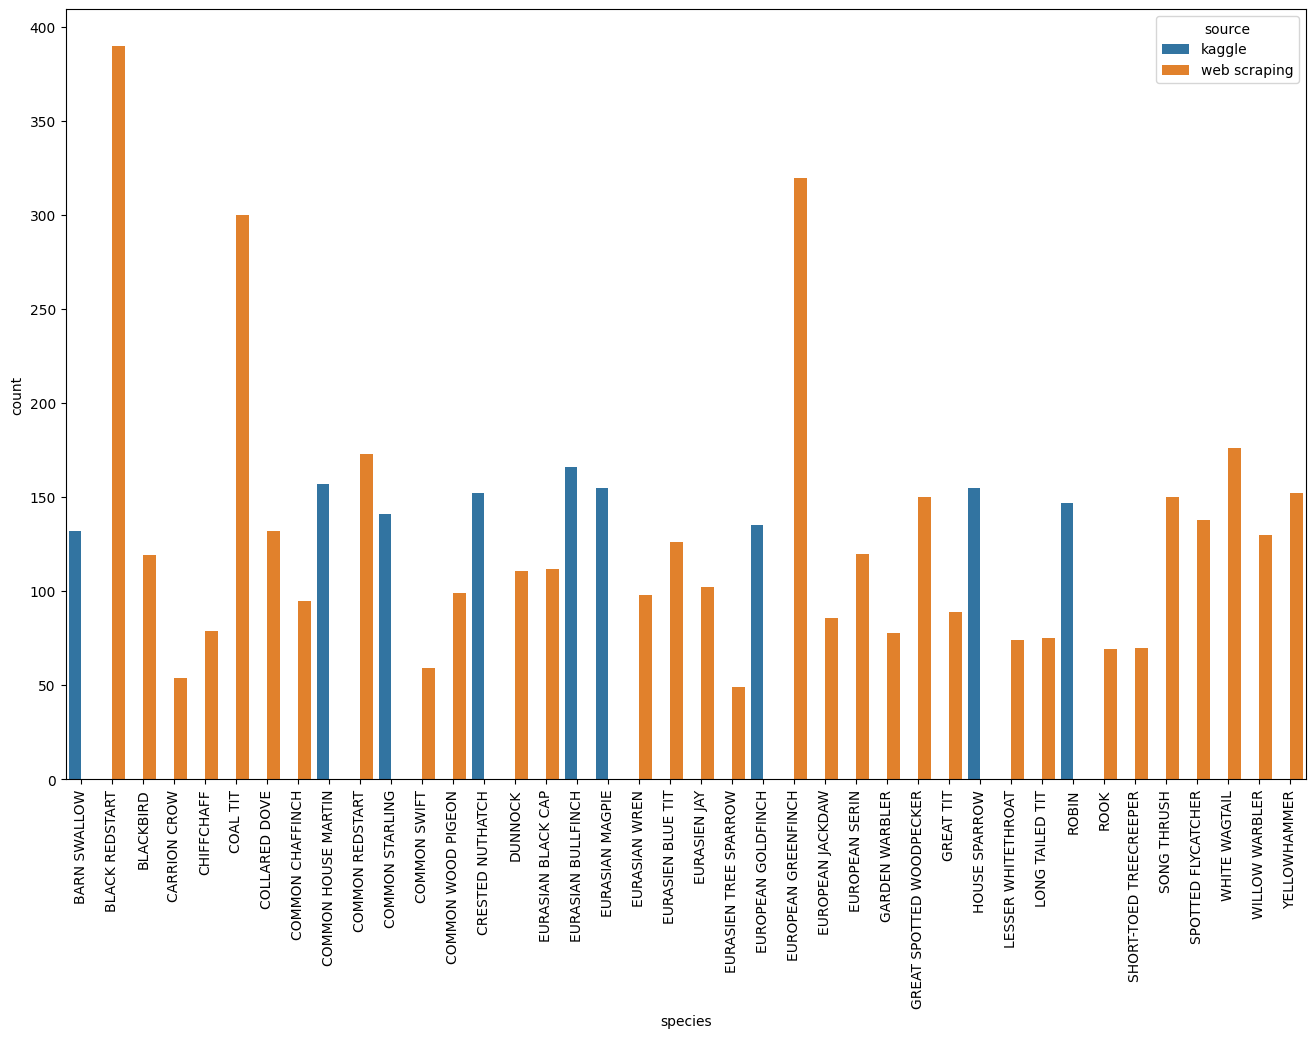

In [13]:
fig2 = plt.figure(figsize=(16,10))

sns.barplot(data = df, x = 'species', y = 'count', hue = 'dataset')
plt.legend(title = 'source')
plt.xticks(rotation=90);

### with pandas & plotly

In [14]:
fig3 = px.bar(df, x = 'species', y = 'count', color = 'dataset')
fig3.update_xaxes(tickangle=270, categoryorder = 'category ascending')
fig3.show()